# Описание данных

* `Snap_date` - дата начала месяца туризма
* `Id_hash` - id абонента. Один абонент может встречаться несколько раз в разных месяцах или городах
* `days` - продолжительность присутствия в днях в точке туризма 
* `home_region` - номер домашнего региона 
* `city` - точка туризма 
* `gender` - предсказанный моделью пол абонента. 
> * 1 – мужчина;
> * 2 – женщина;
> * 3 – неизвестно;
* `age` - предсказанный моделью возраст абонента в годах 
* `mou` - голосовой трафик абонента за месяц (snap_date) в минутах 
* `mou_out` - исходящий голосовой трафик абонента за месяц в минутах 
* `dou` - интернет-трафик абонента за месяц, МБ
* `Interests` - список интересов абонента за месяц snap_date 
* `top_service` - url, по которому у абонента больше всего трафика за месяц 
* `volume_sum` - трафик абонента за время присутствия в точке туризма, МБ
* `dl/ul_volume_sum` - разложение volume_sum на uplink, downlink, МБ
* `Column_1` - служебное поле, не информативное

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth
import calendar

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import datetime as dt
from datetime import datetime, timedelta

from pandas_profiling import ProfileReport

## Чтение файлов

In [4]:
path_local_21 = '/kaggle/input/spgu-olimp/Олимпиада для первых_2023 материалы/Кейс, критерии и данные для кейса/Данные_2021/'
csv_files_21 = ['Tourists_Абинск_2021.csv', 'Tourists_Александров_2021.csv', 'Tourists_Армавир_2021.csv',
             'Tourists_Байкальск_2021.csv', 'Tourists_Белореченск_2021.csv', 'Tourists_Вязники_2021.csv', 
             'Tourists_Горно-Алтайск_2021.csv', 'Tourists_Городищи_2021.csv', 'Tourists_Гороховец_2021.csv',
             'Tourists_Горячий Ключ_2021.csv', 'Tourists_Гулькевичи_2021.csv', 'Tourists_Ейск_2021.csv', 
             'Tourists_Ковров_2021.csv', 'Tourists_Кольчугино_2021.csv', 'Tourists_Кореновск_2021.csv', 
             'Tourists_Кропоткин_2021.csv', 'Tourists_Крымск_2021.csv', 'Tourists_Курганинск_2021.csv',
             'Tourists_Лабинск_2021.csv', 'Tourists_Лакинск_2021.csv', 'Tourists_Меленки_2021.csv', 
             'Tourists_Муром_2021.csv', 'Tourists_Новокубанск_2021.csv', 'Tourists_Петушки_2021.csv',
             'Tourists_Покров_2021.csv', 'Tourists_Сириус_2021.csv', 'Tourists_Славянск-на-Кубани_2021.csv', 
             'Tourists_Сортавала_2021.csv', 'Tourists_Струнино_2021.csv', 'Tourists_Темрюк_2021.csv', 
             'Tourists_Тимашевск_2021.csv', 'Tourists_Тихорецк_2021.csv', 'Tourists_Туапсе_2021.csv', 
             'Tourists_Усть-Лабинск_2021.csv', 'Tourists_Хадыженск_2021.csv', 'Tourists_Юрьев-Польский_2021.csv']

df_2021 = pd.read_csv(path_local_21 + 'Tourists_Абинск_2021.csv')
for file in csv_files_21:
    if file != 'Tourists_Абинск_2021.csv':
        df = pd.read_csv(f'{path_local_21}{file}')
        df_2021 = pd.concat([df_2021, df], ignore_index=True)
        
df_2021 = df_2021.drop(columns=['Unnamed: 0'])     
        
    
path_local_22 = '/kaggle/input/spgu-olimp/Олимпиада для первых_2023 материалы/Кейс, критерии и данные для кейса/Данные_2022/'
csv_files_22 = ['Tourists_Абинск_2022.csv', 'Tourists_Александров_2022.csv', 'Tourists_Армавир_2022.csv',
             'Tourists_Байкальск_2022.csv', 'Tourists_Белореченск_2022.csv', 'Tourists_Вязники_2022.csv',
             'Tourists_Горно-Алтайск_2022.csv', 'Tourists_Городищи_2022.csv', 'Tourists_Гороховец_2022.csv',
             'Tourists_Горячий Ключ_2022.csv', 'Tourists_Гулькевичи_2022.csv', 'Tourists_Ейск_2022.csv',
             'Tourists_Ковров_2022.csv', 'Tourists_Кольчугино_2022.csv', 'Tourists_Кореновск_2022.csv',
             'Tourists_Кропоткин_2022.csv', 'Tourists_Крымск_2022.csv', 'Tourists_Курганинск_2022.csv',
             'Tourists_Лабинск_2022.csv', 'Tourists_Лакинск_2022.csv', 'Tourists_Меленки_2022.csv',
             'Tourists_Муром_2022.csv', 'Tourists_Новокубанск_2022.csv', 'Tourists_Петушки_2022.csv',
             'Tourists_Покров_2022.csv', 'Tourists_Сириус_2022.csv', 'Tourists_Славянск-на-Кубани_2022.csv',
             'Tourists_Сортавала_2022.csv', 'Tourists_Струнино_2022.csv', 'Tourists_Темрюк_2022.csv',
             'Tourists_Тимашевск_2022.csv', 'Tourists_Тихорецк_2022.csv', 'Tourists_Туапсе_2022.csv',
             'Tourists_Усть-Лабинск_2022.csv', 'Tourists_Хадыженск_2022.csv', 'Tourists_Юрьев-Польский_2022.csv']

df_2022 = pd.read_csv(path_local_22 + 'Tourists_Абинск_2022.csv')
for file in csv_files_22:
    if file != 'Tourists_Абинск_2022.csv':
        df = pd.read_csv(f'{path_local_22}{file}')
        df_2022 = pd.concat([df_2022, df], ignore_index=True)
        
df_2022 = df_2022.drop(columns=['Unnamed: 0'])     


df_2021['snap_date_datetime'] = pd.to_datetime(df_2021['snap_date'])
df_2022['snap_date_datetime'] = pd.to_datetime(df_2022['snap_date'])

Покров<br>
Горховец<br>
Лакинск<br>
Петушки<br>
Сириус<br>

In [5]:
df_2021_res = df_2021[['city', 'snap_date','tourists_region', 'home_region', 'days']]
df_2022_res = df_2022[['city', 'snap_date','tourists_region', 'home_region', 'days']]

In [6]:
#dublicated_2021 = df_2021_res.groupby(by=['city', 'snap_date', 'tourists_region', 'home_region', 'days']).count()

#df.groupby (df.columns.tolist (), as_index= False ). size ()
dublicated = df_2021_res.groupby(df_2021_res.columns.tolist(), as_index=False).size()
cities = [
    'Покров',
    'Гороховец',
    'Лакинск',
    'Петушки',
    'Сириус',
]
dublicated = dublicated[dublicated['city'].isin(cities)]
dublicated_on_size = dublicated.groupby(['city', 'size']).count()
dublicated_on_size
#dublicated = dublicated.groupby(['city']).count()
#dublicated

#dublicated_2021 = df_2021_res.groupby(by=['city', 'snap_date', 'tourists_region', 'home_region', 'days']).count()

#df.groupby (df.columns.tolist (), as_index= False ). size ()
dublicated_2022 = df_2022_res.groupby(df_2022_res.columns.tolist(), as_index=False).size()
cities = [
    'Покров',
    'Гороховец',
    'Лакинск',
    'Петушки',
    'Сириус',
]
dublicated_2022 = dublicated_2022[dublicated_2022['city'].isin(cities)]
dublicated_on_size_2022 = dublicated_2022.groupby(['city', 'size']).count()
dublicated_on_size_2022
#dublicated = dublicated.groupby(['city']).count()
#dublicated

# dublicated_on_size_2022.to_csv('dolya_vorovskaya_2022.csv')
# dublicated_on_size.to_csv('dolya_vorovskaya_2021.csv')

snap_date  tourists_region  home_region  days
city      size                                               
Гороховец 1          3322             3322         3322  3322
          2          1489             1489         1489  1489
          3           890              890          890   890
          4           577              577          577   577
          5           390              390          390   390
...                   ...              ...          ...   ...
Сириус    1324          1                1            1     1
          1439          1                1            1     1
          1474          1                1            1     1
          1589          1                1            1     1
          1720          1                1            1     1

[1185 rows x 4 columns]

In [7]:
group_count_df_2021_new_task = df_2021_res.groupby('city').count()['snap_date']
group_count_df_2022_new_task = df_2022_res.groupby('city').count()['snap_date']

In [8]:
group_count_df_2021_new_task

city
Абинск                 55048
Александров            52100
Армавир               112905
Байкальск              43825
Белореченск            55399
Вязники                85244
Горно-Алтайск          50739
Городищи               28461
Гороховец             103298
Горячий Ключ          416797
Гулькевичи             48739
Ейск                   57799
Ковров                 32600
Кольчугино             10279
Кореновск             303185
Кропоткин             104214
Крымск                121509
Курганинск             38444
Лабинск                28677
Лакинск               101232
Меленки                 9142
Муром                  72767
Новокубанск            90814
Петушки                83157
Покров                 99532
Сириус                462833
Славянск-на-Кубани    178141
Сортавала              27123
Струнино               37798
Темрюк                227881
Тимашевск             258132
Тихорецк              153137
Туапсе                237624
Усть-Лабинск           58060
Хадыженск

In [15]:
grouped_count_2021_wind = pd.merge(dublicated_on_size.reset_index(), group_count_df_2021_new_task, on='city')
grouped_count_2022_wind = pd.merge(dublicated_on_size_2022.reset_index(), group_count_df_2022_new_task, on='city')
grouped_count_2021_wind

,city,size,snap_date_x,tourists_region,home_region,days,snap_date_y
0,Гороховец,1,2340,2340,2340,2340,103298
1,Гороховец,2,1814,1814,1814,1814,103298
2,Гороховец,3,721,721,721,721,103298
3,Гороховец,4,685,685,685,685,103298
4,Гороховец,5,340,340,340,340,103298
...,...,...,...,...,...,...,...
1297,Сириус,1543,1,1,1,1,462833
1298,Сириус,1614,1,1,1,1,462833
1299,Сириус,1787,1,1,1,1,462833
1300,Сириус,1912,1,1,1,1,462833


In [16]:
display(grouped_count_2021_wind, grouped_count_2022_wind)

,city,size,snap_date_x,tourists_region,home_region,days,snap_date_y
0,Гороховец,1,2340,2340,2340,2340,103298
1,Гороховец,2,1814,1814,1814,1814,103298
2,Гороховец,3,721,721,721,721,103298
3,Гороховец,4,685,685,685,685,103298
4,Гороховец,5,340,340,340,340,103298
...,...,...,...,...,...,...,...
1297,Сириус,1543,1,1,1,1,462833
1298,Сириус,1614,1,1,1,1,462833
1299,Сириус,1787,1,1,1,1,462833
1300,Сириус,1912,1,1,1,1,462833


,city,size,snap_date_x,tourists_region,home_region,days,snap_date_y
0,Гороховец,1,3322,3322,3322,3322,91670
1,Гороховец,2,1489,1489,1489,1489,91670
2,Гороховец,3,890,890,890,890,91670
3,Гороховец,4,577,577,577,577,91670
4,Гороховец,5,390,390,390,390,91670
...,...,...,...,...,...,...,...
1180,Сириус,1324,1,1,1,1,401784
1181,Сириус,1439,1,1,1,1,401784
1182,Сириус,1474,1,1,1,1,401784
1183,Сириус,1589,1,1,1,1,401784


In [17]:
grouped_count_2021_wind['result'] = ((grouped_count_2021_wind['snap_date_x'] * grouped_count_2022_wind['size']) / grouped_count_2021_wind['snap_date_y']) * 100
grouped_count_2022_wind['result'] = ((grouped_count_2022_wind['snap_date_x'] * grouped_count_2022_wind['size']) / grouped_count_2022_wind['snap_date_y']) * 100

In [18]:
display(grouped_count_2021_wind, grouped_count_2022_wind)

,city,size,snap_date_x,tourists_region,home_region,days,snap_date_y,result
0,Гороховец,1,2340,2340,2340,2340,103298,2.265291
1,Гороховец,2,1814,1814,1814,1814,103298,3.512169
2,Гороховец,3,721,721,721,721,103298,2.093942
3,Гороховец,4,685,685,685,685,103298,2.652520
4,Гороховец,5,340,340,340,340,103298,1.645724
...,...,...,...,...,...,...,...,...
1297,Сириус,1543,1,1,1,1,462833,NaN
1298,Сириус,1614,1,1,1,1,462833,NaN
1299,Сириус,1787,1,1,1,1,462833,NaN
1300,Сириус,1912,1,1,1,1,462833,NaN


,city,size,snap_date_x,tourists_region,home_region,days,snap_date_y,result
0,Гороховец,1,3322,3322,3322,3322,91670,3.623868
1,Гороховец,2,1489,1489,1489,1489,91670,3.248609
2,Гороховец,3,890,890,890,890,91670,2.912621
3,Гороховец,4,577,577,577,577,91670,2.517727
4,Гороховец,5,390,390,390,390,91670,2.127195
...,...,...,...,...,...,...,...,...
1180,Сириус,1324,1,1,1,1,401784,0.329530
1181,Сириус,1439,1,1,1,1,401784,0.358153
1182,Сириус,1474,1,1,1,1,401784,0.366864
1183,Сириус,1589,1,1,1,1,401784,0.395486


Покров


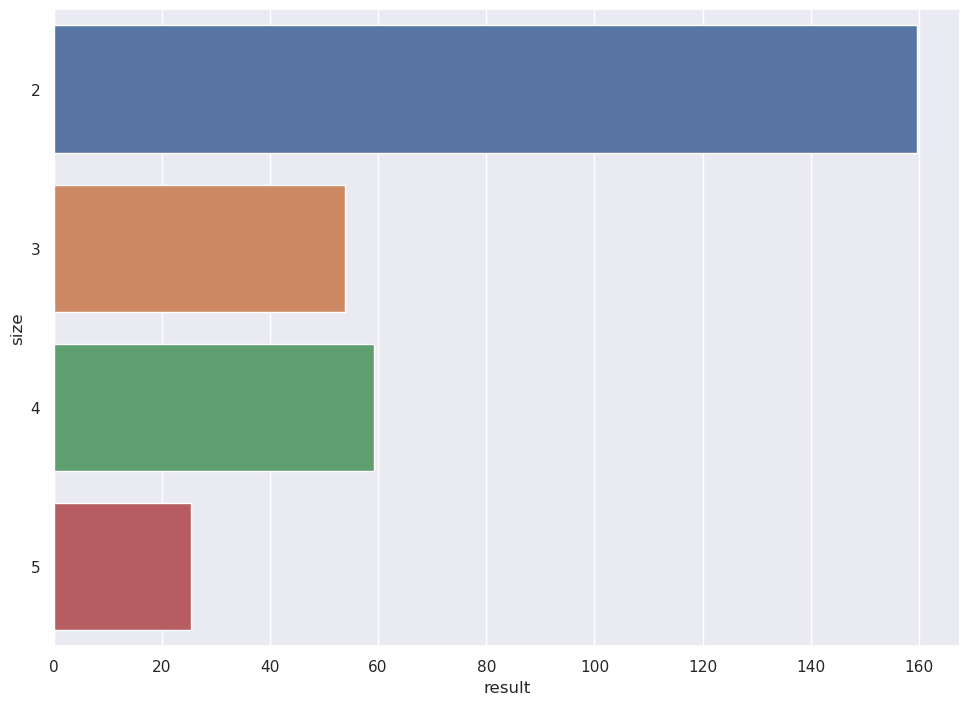

Гороховец


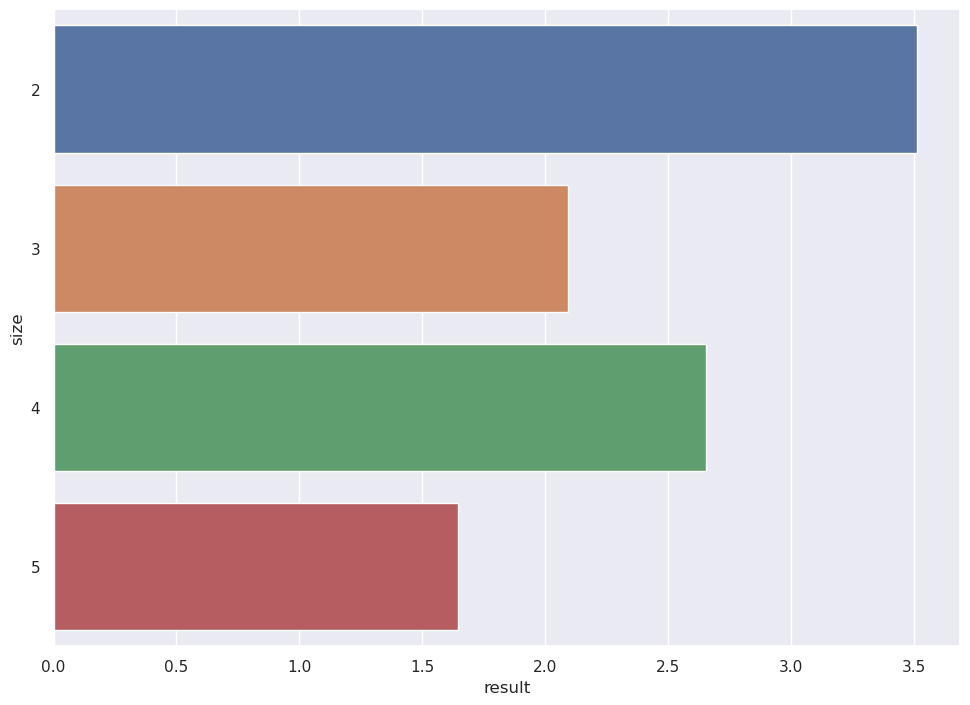

Лакинск


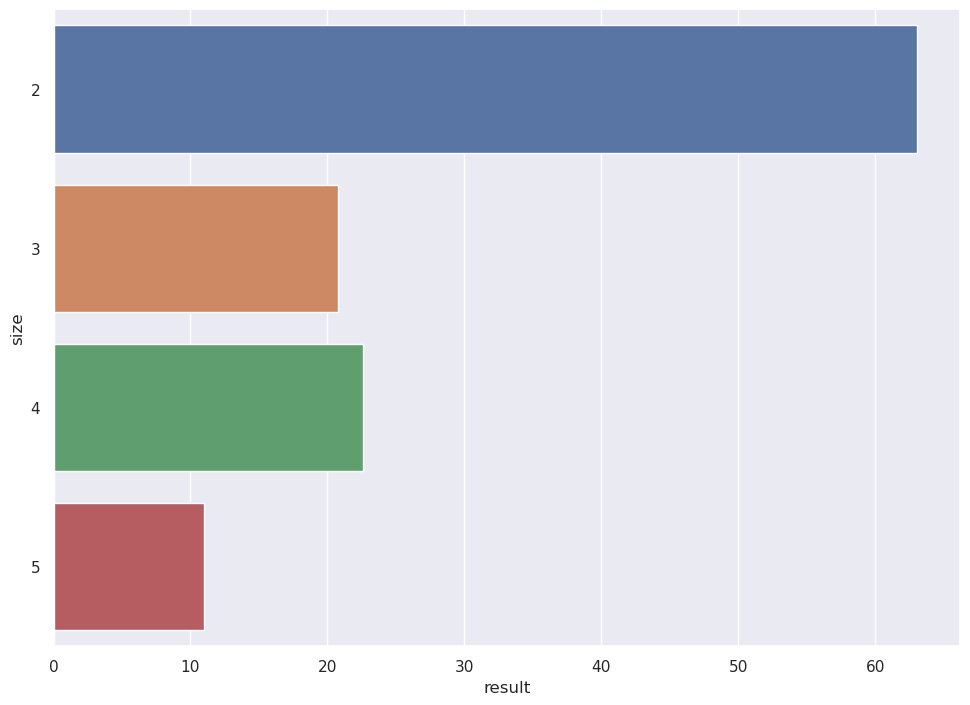

Петушки


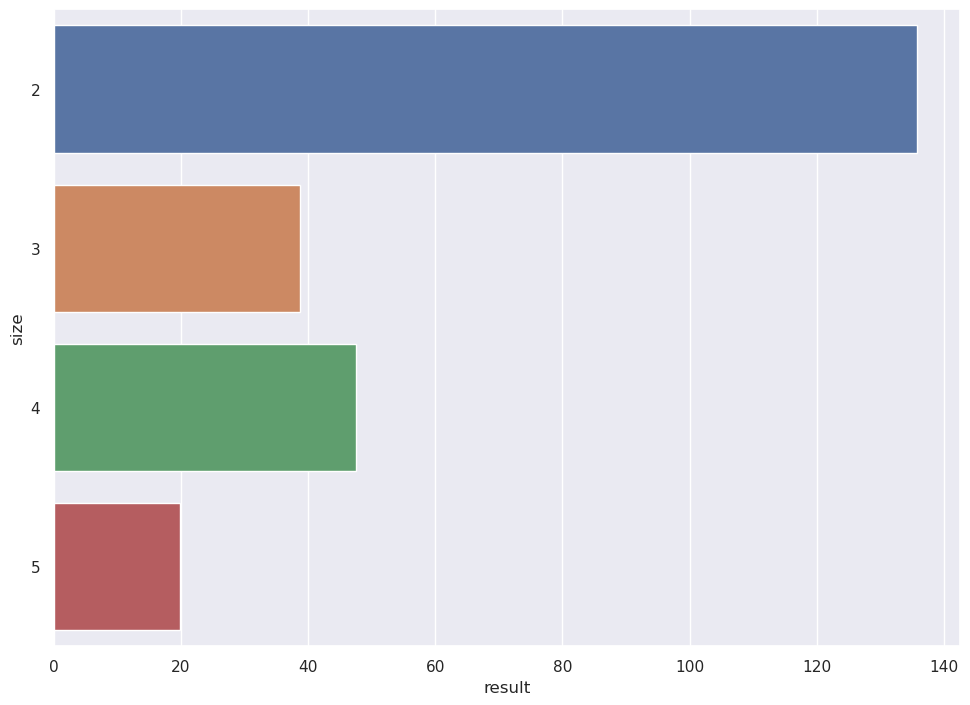

Сириус


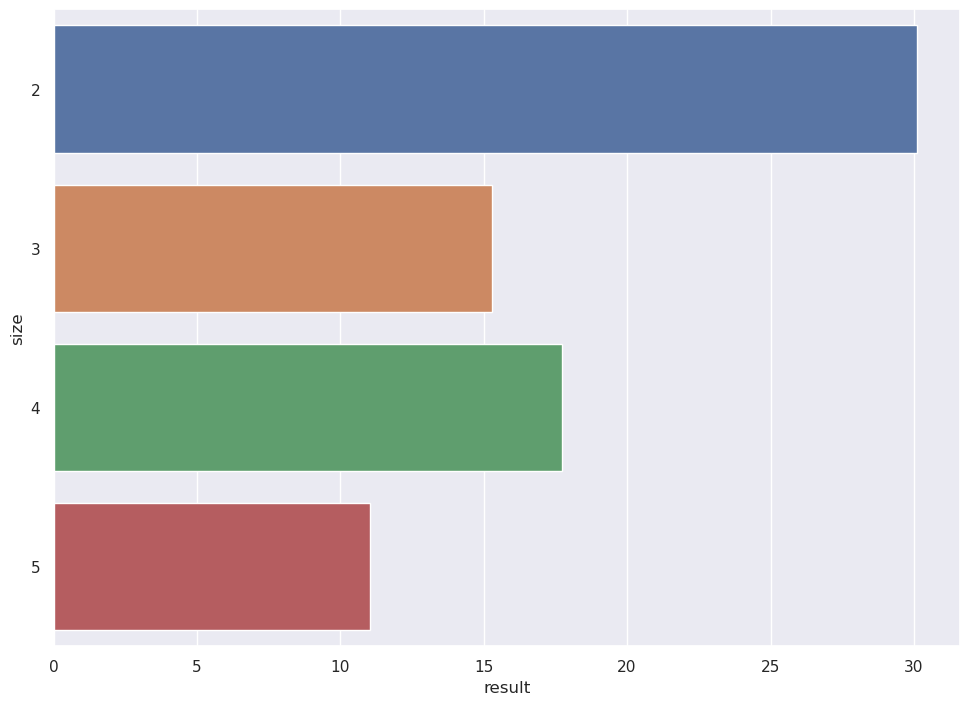

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


cities = [
    'Покров',
    'Гороховец',
    'Лакинск',
    'Петушки',
    'Сириус',
]

for i in cities:
    print(i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    to_plot = grouped_count_2021_wind[(grouped_count_2021_wind['city'] == i) & (grouped_count_2021_wind['size'] >= 2) & (grouped_count_2021_wind['size'] <= 5)]
    sns.barplot(data=to_plot, x='result', y='size', orient="h")
    plt.show()